# A brief demonstration of the surveygraph package

## Growing Up in Ireland

We'll give a brief demonstration of the _surveygraph_ method using the [Growing Up in Ireland](https://www.growingup.gov.ie) dataset, a major longitudinal study of youth development in Ireland. We have permission to use this data in a workshop setting in line with GDPR, however we ask that if you download a copy of this dataset during the workshop, you delete it afterwards. Permission to use this data can be obtained by the [Central Statistics Office](https://www.cso.ie/en/surveys/householdsurveys/growingupinirelandsurvey/).

![GUI logo](https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/gui-logo-wide.jpg)

Let's read this data from its temporary location on the [Github page](https://github.com/surveygraph/surveygraph-tutorials/tree/main) for our workshop material.

In [37]:
gui <- read.csv("https://raw.githubusercontent.com/surveygraph/surveygraph-tutorials/main/presentations/gui.csv")

This particular dataset consists of 11134 respondents and 76 survey items.

In [38]:
str(gui)

'data.frame':	11134 obs. of  76 variables:
 $ Partner                 : int  0 1 1 1 0 1 1 0 1 1 ...
 $ Peopleinhousehold       : int  2 3 4 4 4 4 4 5 5 5 ...
 $ Gender                  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Age_caregiver           : int  20 22 26 34 28 32 35 36 23 29 ...
 $ gender_child            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age_child               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ gnderP3                 : int  NA 1 1 1 1 1 1 2 1 1 ...
 $ age_person_3            : int  NA 38 27 33 7 32 35 11 32 26 ...
 $ rel_to_study_child      : int  NA 3 3 3 11 3 3 11 3 3 ...
 $ GNDER_P4                : int  NA NA 1 2 1 1 1 2 2 2 ...
 $ AGE_P4                  : int  NA NA 6 5 4 4 2 9 4 7 ...
 $ REL_STUDY_CHILD_P4      : int  NA NA 11 11 11 11 11 11 11 11 ...
 $ gender_p5               : int  NA NA NA NA NA NA NA 1 2 1 ...
 $ age_p5                  : int  NA NA NA NA NA NA NA 2 2 2 ...
 $ rel_study_child_p5      : int  NA NA NA NA NA NA NA 11 11 11 ...
 $ gender_p6              

## Selecting variables
We want to retain the variables relating to attachment, in particular, behavioural variables pertaining to the interactions between caregivers and infants.

Of the 76 variables in the survey, we focus on the following eight.

In [94]:
gui <- gui[c(
    "criesnerves",              # when baby cries, how often does it get on your nerves?
    "talktobaby",               # do you talk to baby while you are busy doing other things?
    "wakeforfeed",              # do you ever wake baby for a feed during the night?
    "wherebabysleep",           # where does baby usually sleep?
    "babycryingproblem",        # do you feel that baby's crying is a problem for you?
    "sleepingproblemforyou",    # how much is baby's sleeping pattern a problem for you?
    "siblings",                 # does baby have siblings living in this household?
    "babyeverbreastfed"         # was baby ever breasfed?
)]

head(gui)

,criesnerves,talktobaby,wakeforfeed,wherebabysleep,babycryingproblem,sleepingproblemforyou,siblings,babyeverbreastfed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,4,3,3,2,4,2,2
2,2,5,1,3,2,4,2,1
3,1,4,3,3,2,4,1,2
4,2,4,2,3,2,3,1,1
5,1,4,3,2,2,4,1,1
6,1,4,3,1,2,4,1,2


## Data cleaning

For simplicity, the only preprocessing of the data we'll do is to omit any row than contains an NA entry.

In [45]:
nrowi <- nrow(gui)     # number of rows, initial 
gui <- (na.omit(gui))
nrowf <- nrow(gui)     # number of rows, final

# nrowi - nrowf        # difference, number of rows containing an NA entry

## Graph representation of surveys

We now load the _surveygraph_ package to produce a network representation of the survey.

In [28]:
library("surveygraph")

First, we take a small subset of the survey, keeping only the first 200 respondents.

In [49]:
gui <- head(gui, 200)

The main method in the surveygraph package is a rapid comparison of each pair of rows in the survey, which we refer to as a projection, due to its resemblance to bipartite graph methods. This method returns a graph in the form of an edge list,

In [51]:
e <- make_projection(gui, layer="agent", threshold_method="lcc")

which we see contains 4461 weighted edges (_u_, _v_, _w_).

In [53]:
str(e)

'data.frame':	4461 obs. of  3 variables:
 $ u     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ v     : int  35 38 41 43 44 47 48 55 59 63 ...
 $ weight: num  0.9 0.82 0.87 0.85 0.75 0.9 0.9 0.81 0.9 0.75 ...


## Visualising the graph

Next, we load the _igraph_ library in order to visualise the graph.

In [64]:
library("igraph")

options(repr.plot.width = 10, repr.plot.height = 10)

We reformat our edge list to an _igraph_ data structure,

In [101]:
g <- graph_from_data_frame(e, directed=FALSE)

and plot using a force-directed graph layout, producing the following.

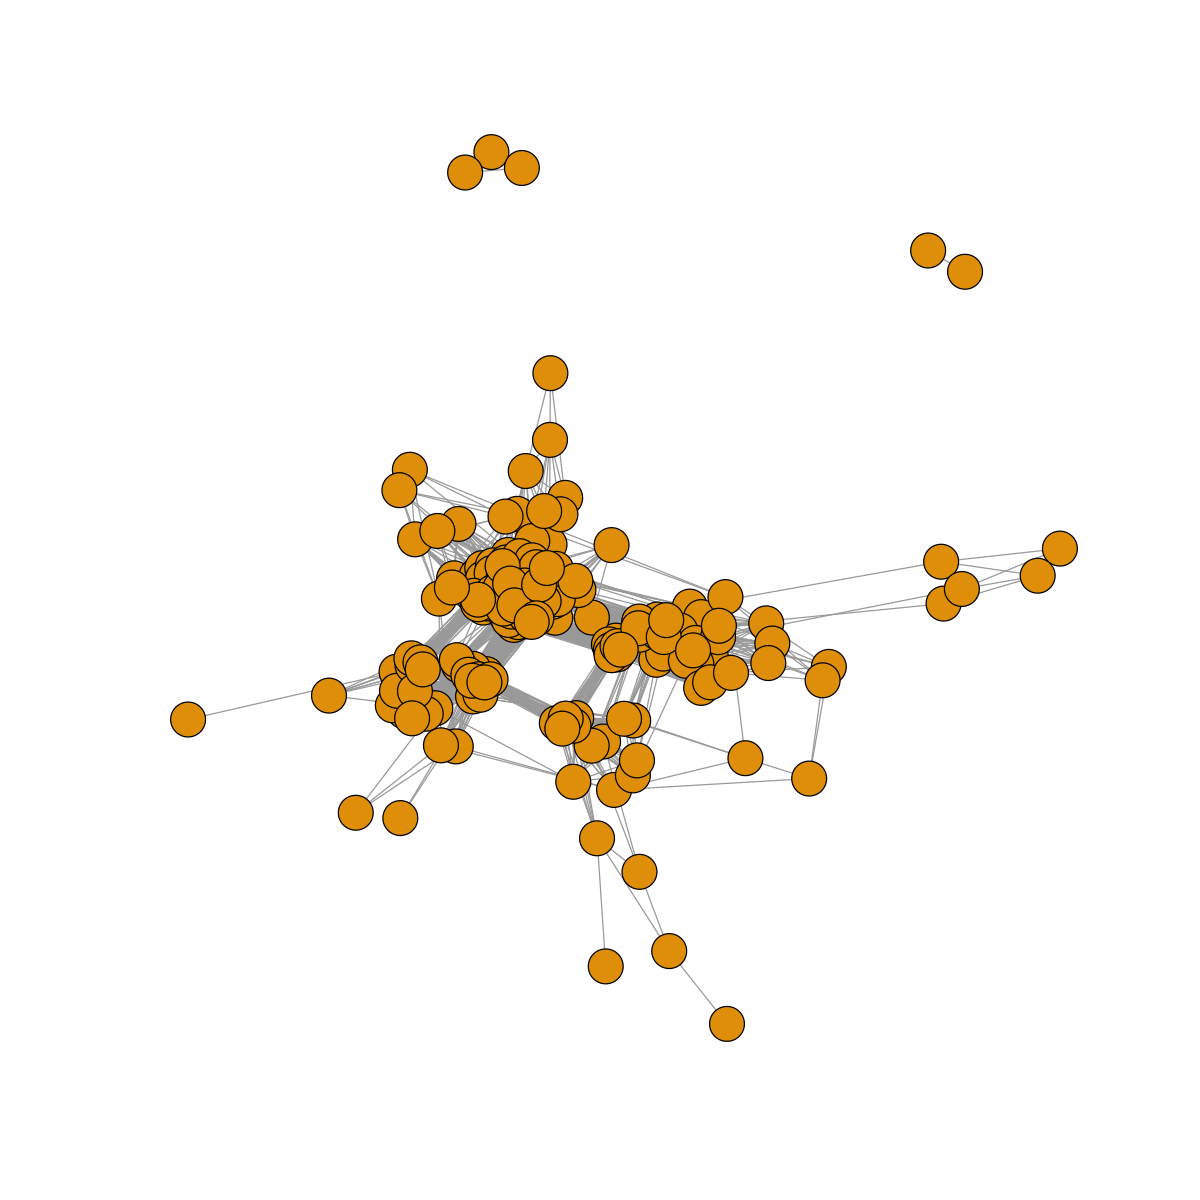

In [102]:
plot(
    g, 
    vertex.size=8, 
    vertex.label=NA, 
    layout=layout.fruchterman.reingold
)

## Community detection

When we plot using a force-directed graph layout, we observe clear clustering of nodes. To quantify this structure, we apply a community detection algorithm known as _walktrap_ to partition nodes into communities.

In [96]:
walktrap <- cluster_walktrap(g, steps=2)

We assign the colour of each node according to its community,

In [99]:
V(g)$color <- walktrap$membership

and visualise once again, with community detection broadly confirming the structure that we see by inspection.

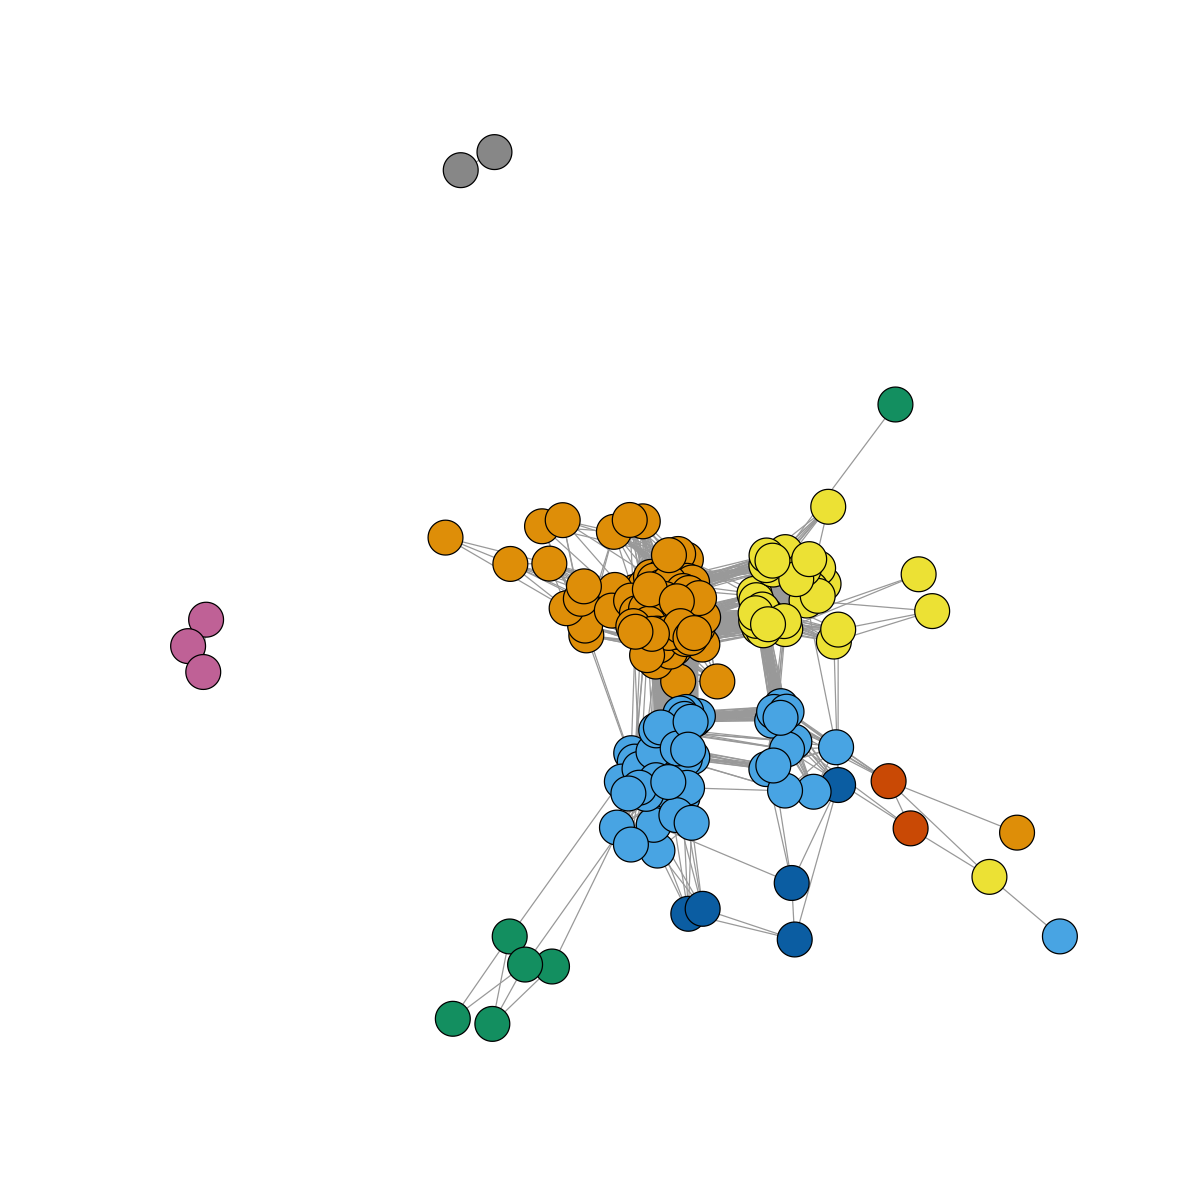

In [98]:
plot(
    g, 
    vertex.size=8, 
    vertex.label=NA,
    layout=layout.fruchterman.reingold
)